# Vidic, Fajfar and Fischinger (1994)

This procedure, proposed by [Vidic, Fajfar and Fischinger  (1994)](http://onlinelibrary.wiley.com/doi/10.1002/eqe.4290230504/abstract), aims to determine the displacements from an inelastic design spectra for systems with a given ductility factor. The inelastic displacement spectra is determined by means of applying a reduction factor, which depends on the natural period of the system, its ductility factor, the hysteretic behaviour, the damping, and the frequency content of the ground motion.

**Note**: To run the code in a cell:

1. Click on the cell to select it.
2. Press `SHIFT+ENTER` on your keyboard or press the play button (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) in the toolbar above.

In [1]:
import vidic_etal_1994
from rmtk.vulnerability.common import utils
%matplotlib inline 

---
###Load capacity curves

In order to use this methodology, it is necessary to provide one (or a group) of capacity curves, defined according to the format described in the [RMTK manual](../../../../../rmtk-docs.pdf).

Please provide the location of the file containing the capacity curves using the parameter `capacity_curves_file`.

In [2]:
capacity_curves_file = "../../../../../../rmtk_data/capacity_curves_Sa-Sd.csv"

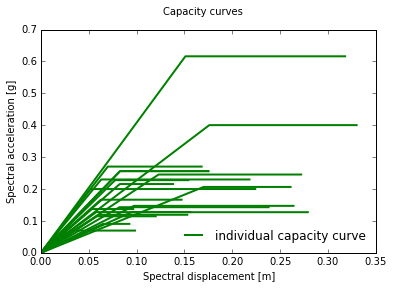

In [3]:
capacity_curves = utils.read_capacity_curves(capacity_curves_file)
utils.plot_capacity_curves(capacity_curves)

### Load ground motion records

Please indicate the path to the folder containing the ground motion records to be used in the analysis through the parameter `gmrs_folder`.

**Note**: Each accelerogram needs to be in a separate CSV file as described in the [RMTK manual](../../../../../rmtk-docs.pdf).

The parameters `minT` and `maxT` are used to define the period bounds when plotting the spectra for the provided ground motion fields.

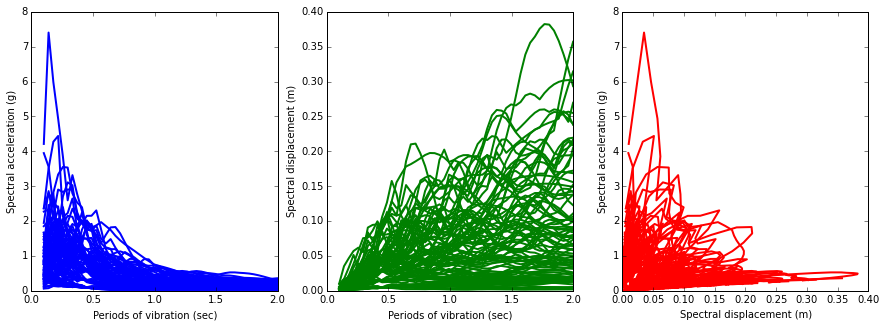

In [4]:
gmrs_folder = "../../../../../../rmtk_data/accelerograms"
gmrs = utils.read_gmrs(gmrs_folder)
minT = 0.1
maxT = 2.0
utils.plot_response_spectra(gmrs, minT, maxT)

###Load damage state thresholds

Please provide the path to your damage model file using the parameter `damage_model_file` in the cell below.

In [5]:
damage_model_file = "../../../../../../rmtk_data/damage_model.csv"

In [6]:
damage_model = utils.read_damage_model(damage_model_file)
print damage_model

{'damage_states': ['Slight', 'Moderate', 'Extensive', 'Collapse'], 'cov': [0.0, 0.0, 0.0, 0.0], 'type_criteria': 'capacity curve dependent', 'type_damage_state': ['Sdy', '3 Sdy 1 Sdu', '1 Sdy 1 Sdu', 'Sdu'], 'distribution': ['normal', 'normal', 'normal', 'normal'], 'mean': [0.5, '0.0', '0.0', '0.0']}


###Calculate fragility functions

The following parameters need to be defined in the cell below in order to calculate the fragility functions:
1. `period`: this parameter defines the time period of the fundamental mode of vibration of the structure
2. `damping_model`: This parameter defines the type of damping model to be used in the analysis. The valid options are "mass" and "stiffness".
3. `damping_ratio`: This parameter defines the damping ratio for the structure
4. `hysteresis_model`: The valid options are 'Q' or "bilinear"
5. `regression_method`: This parameter defines the regression method to be used for estimating the parameters of the fragility functions. The valid options are "least squares" and "max likelihood"

In [7]:
period = 2.0
damping_model = "mass"
damping_ratio = 0.05
hysteresis_model = 'Q'
regression_method = "least squares"

5%
10%
15%
20%
25%
30%
35%
40%
45%
50%
55%
60%
65%
70%
75%
80%
85%
90%
95%
100%


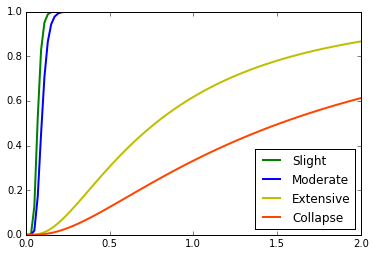

In [8]:
PDM, Sds = vidic_etal_1994.calculate_fragility(capacity_curves, gmrs, 
                                               damage_model, damping_ratio, 
                                               hysteresis_model, damping_model)
fragility_model = utils.calculate_mean_fragility(gmrs, PDM, period, damping_ratio, 
                                                 "Sa", damage_model, regression_method)
utils.plot_fragility_model(fragility_model, 0.01, 2.00)